In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df_origin = pd.read_csv("./Data/D_train.csv")

In [52]:
df = df_origin
df = df.drop(['Unnamed: 0'], axis=1)

In [53]:
a1 = df.iloc[:,np.arange(2,35,3)].apply(np.mean,axis=1)
a2 = df.iloc[:,np.arange(3,36,3)].apply(np.mean,axis=1)
a3 = df.iloc[:,np.arange(4,37,3)].apply(np.mean,axis=1)
res = pd.DataFrame({'X_mean':a1,'Y_mean':a2,'Z_mean':a3})
res.insert(0,'Class',df['Class'])
res.insert(1,'User',df['User'])

In [54]:
res.insert(5,'X_std',df.iloc[:,np.arange(2,35,3)].apply(np.std,axis=1))
res.insert(6,'Y_std',df.iloc[:,np.arange(3,36,3)].apply(np.std,axis=1))
res.insert(7,'Z_std',df.iloc[:,np.arange(4,37,3)].apply(np.std,axis=1))

In [55]:
res.insert(8,'X_min',df.iloc[:,np.arange(2,35,3)].apply(np.min,axis=1))
res.insert(9,'Y_min',df.iloc[:,np.arange(3,36,3)].apply(np.min,axis=1))
res.insert(10,'Z_min',df.iloc[:,np.arange(4,37,3)].apply(np.min,axis=1))
res.insert(11,'X_max',df.iloc[:,np.arange(2,35,3)].apply(np.max,axis=1))
res.insert(12,'Y_max',df.iloc[:,np.arange(3,36,3)].apply(np.max,axis=1))
res.insert(13,'Z_max',df.iloc[:,np.arange(4,37,3)].apply(np.max,axis=1))
res.insert(14,'Null',df.isnull().sum(axis=1))

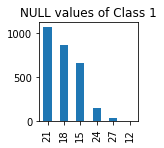

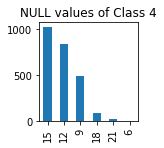

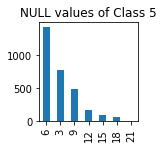

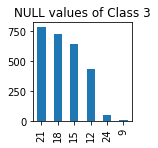

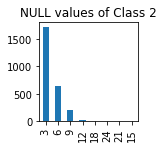

In [23]:
k = 0
for i in res['Class'].unique():
    plt.subplot(231+k)
    res[res['Class']==i].loc[:,'Null'].value_counts().plot(kind='bar')
    plt.title("NULL values of Class {}".format(i))
    plt.show()
    k += 1

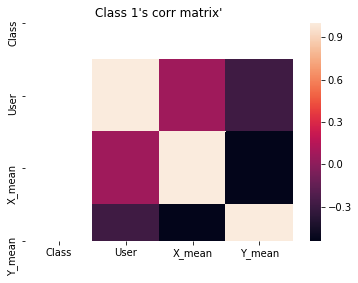

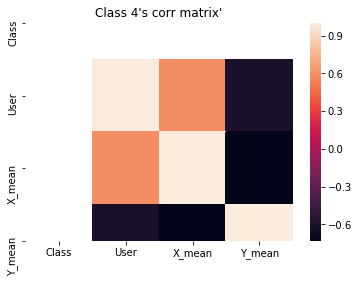

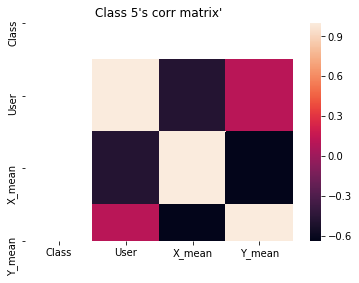

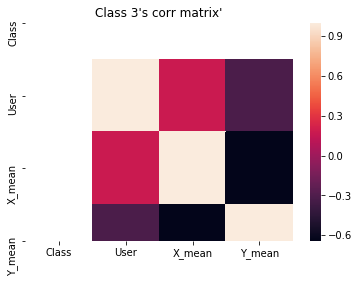

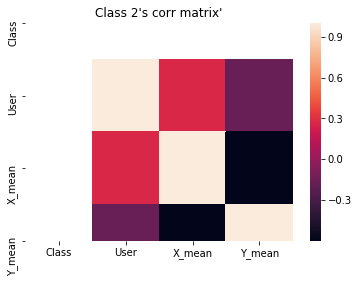

In [87]:
for i in res['Class'].unique():
    sns.heatmap(res.loc[res['Class']==i].iloc[:,:4].corr())
    plt.title("Class {}'s corr matrix'".format(i))
    plt.show()
# res.loc[res['User']==2].corr()['Y_max']
# res['Class'].unique()

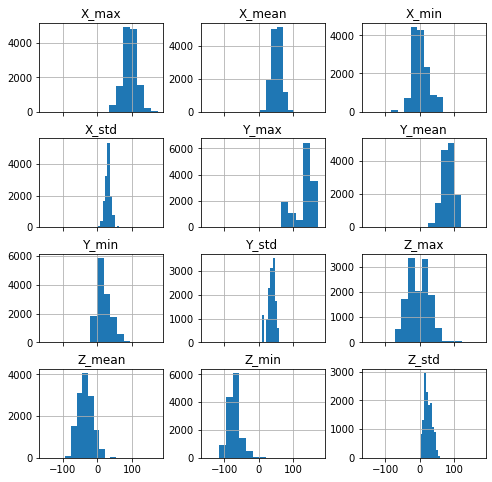

X_mean        Y_mean        Z_mean         X_std         Y_std  \
count  13500.000000  13500.000000  13500.000000  13500.000000  13500.000000   
mean      51.251302     80.373621    -34.503680     30.255553     36.974195   
std       14.693086     17.246827     20.997457      8.007331     11.190146   
min      -61.898213    -50.301817    -92.767794      1.877569      2.545291   
25%       39.890656     67.838747    -49.998885     25.430178     30.795146   
50%       52.488576     81.495304    -36.156457     31.336960     38.893965   
75%       62.079082     94.251337    -18.156529     34.134948     44.182668   
max      102.433624    136.535435     70.051134     69.833732     65.277341   

              Z_std         X_min         Y_min         Z_min         X_max  \
count  13500.000000  13500.000000  13500.000000  13500.000000  13500.000000   
mean      24.385289      1.818376     18.048175    -69.979004     93.476938   
std       11.497603     22.985188     20.406169     17.959632     20.850893   
min        2.080092   -121.182089    -98.233756   -151.592200    -27.857612   
25%       16.001879    -13.215606      3.874427    -83.301733     78.941544   
50%       23.595284     -3.355784     13.191128    -68.827678     92.440150   
75%       32.168509     13.176117     26.791033    -60.953941    108.646575   
max       58.156458     68.288056     95.296677     40.474604    174.054403   

              Y_max         Z_max  
count  13500.000000  13500.000000  
mean     130.757534     -2.775697  
std       26.737334     30.435922  
min      -39.663200    -72.571532  
25%      127.423988    -25.165756  
50%      139.227723     -2.521009  
75%      149.616753     16.989548  
max      170.209350    122.569627

In [19]:
res.iloc[:,2:].hist(figsize=(8,8), sharex=True)
plt.show()
res.iloc[:,2:].describe()

In [16]:
# PCA, check the scree plot and variance sum
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=6)
without_std = res.iloc[:,1:].copy()
pca.fit(without_std)
print("PCA first 6 largest components without standardization")
print(pca.explained_variance_ratio_)
print("The first 6 components adds up to:", pca.explained_variance_ratio_.sum())
scaler = StandardScaler()
scaler.fit(without_std)
with_std = scaler.transform(without_std)
pca.fit(with_std)
print("\nPCA first 6 largest components with standardization")
print(pca.explained_variance_ratio_)
print("The first 6 components adds up to:", pca.explained_variance_ratio_.sum())
# pca.components_

PCA first 6 largest components without standardization
[0.43066192 0.25323894 0.09839378 0.08989567 0.06628123 0.03661315]
The first 6 components adds up to: 0.9750846922268127

PCA first 6 largest components with standardization
[0.34190993 0.2646643  0.11043225 0.09605038 0.06165411 0.05276476]
The first 6 components adds up to: 0.9274757298930398


In [21]:
pca = PCA()
pca.fit(res.iloc[:,2:])
print("The 6 components ratio that adds up to:", pca.explained_variance_ratio_[:6].sum().round(4))

The 6 components ratio that adds up to: 0.9775


In [54]:
cor_index = res.corr()['Class'].abs().sort_values(ascending=False)[:7].index
cor = res[cor_index.tolist()].copy()
cor.insert(7,'User',res['User'])
cor.head()

Class       Y_max      Z_std      Y_std  Null     Y_mean      X_std  User
0      1   88.677279  10.160386  27.073119    21  58.867650  18.666696     0
1      4  137.176253  17.232253  36.079442    15  88.110860  22.312891     0
2      5  132.025198  35.833802  31.704365     6  95.257718  32.735882     0
3      3  135.408132  16.251145  40.297901    21  73.585900  10.781195     0
4      4  140.253960  13.744301  31.351720    18  99.091355  18.623003     0

In [31]:
# We pick the first 6 eigenvectors
pca = PCA(n_components=6)
res_pca = pca.fit_transform(res.iloc[:,2:])
after_pca = pd.DataFrame(data=res_pca, columns = ['1','2','3','4','5','6'])
after_pca

1          2          3          4          5          6
0      80.803375  -8.018573  -2.799130  15.283954  -6.063840  -9.424119
1      35.769591  43.417085 -16.898710 -53.994718 -17.781492  12.900612
2     -11.232235  17.657224  12.917469 -27.621777 -22.098324  -6.717234
3      46.217752 -19.727657 -38.361676   4.686685 -21.667123   6.967712
4      19.502917  52.557799 -37.965385 -26.644931 -15.192068  -0.067863
...          ...        ...        ...        ...        ...        ...
13495 -23.931707 -29.702768  -8.874625  14.506381   2.848446  -0.931392
13496 -31.667945  14.946287   3.082346 -25.803905  20.791752  11.743399
13497 -25.280466 -27.732109  -8.849702  13.808928   4.380055  -1.154310
13498  35.269095  22.514251   1.714447  13.965473   1.124355   5.730900
13499 -29.587966  15.336921   3.964353 -27.678284  18.702878   9.618075

[13500 rows x 6 columns]

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import PredefinedSplit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Pick the params according to the pipeline you construct

params = {
    'svm__C':[0.1,0.5,1,10,50,100,500],
    'svm__gamma':[0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50],
    'dc__max_depth':[None,1,3,5,7,9],
    'knn__n_neighbors':[1,2,3,4,5,6,7],
    'preprocessing__pca__n_components':[4,5,6],
    'preprocessing__scaler__with_std': [True, False],
    'preprocessing__scaler__with_mean': [True, False],}

preprocessing = Pipeline([('scaler', StandardScaler()),
                         ('pca', PCA()),
                         ('lda', LinearDiscriminantAnalysis())])

motion_pipeline = Pipeline([('preprocessing', preprocessing),
                            ('svm', SVC(kernel='rbf'))])

In [60]:
X_dropped = res.drop('Class', axis=1)
y_dropped = res['Class']
# get_best_model_and_accuracy(motion_pipeline, params, X_dropped, y_dropped)
cv = res['User'].astype(int)
cv = PredefinedSplit(cv)
gs = GridSearchCV(motion_pipeline,params,cv=cv, error_score=0., n_jobs=-1)
gs.fit(X_dropped, y_dropped)

GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0,  0, ..., 11, 11])),
             error_score=0.0,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        Pipeline(memory=None,
                                                 steps=[('scale',
                                                         StandardScaler(copy=True,
                                                                        with_mean=True,
                                                                        with_std=True))],
                                                 verbose=False)),
                                       ('svm',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='o...
                

In [61]:
print("Best Accuracy: {}".format(gs.best_score_))
print("Best Parameters: {}".format(gs.best_params_))
print("Average Time to Fit (s):{}".format(round(gs.cv_results_['mean_fit_time'].mean(), 3)))

Best Accuracy: 0.9887407407407407
Best Parameters: {'svm__C': 1, 'svm__gamma': 0.01}
Average Time to Fit (s):3.539
Average Time to Score (s):0.239


In [16]:
###########Test section###############
df_test_o = pd.read_csv("./Data/D_test.csv")
df_test_o = df_test_o.drop(['Unnamed: 0'], axis=1)
df_test_o.head()
df_test = df_test_o.copy()

In [17]:
a1 = df_test.iloc[:,np.arange(2,35,3)].apply(np.mean,axis=1)
a2 = df_test.iloc[:,np.arange(3,36,3)].apply(np.mean,axis=1)
a3 = df_test.iloc[:,np.arange(4,37,3)].apply(np.mean,axis=1)
res_test = pd.DataFrame({'X_mean':a1,'Y_mean':a2,'Z_mean':a3})
res_test.insert(0,'Class',df_test['Class'])
res_test.insert(1,'User',df_test['User'])
res_test.insert(5,'X_std',df_test.iloc[:,np.arange(2,35,3)].apply(np.std,axis=1))
res_test.insert(6,'Y_std',df_test.iloc[:,np.arange(3,36,3)].apply(np.std,axis=1))
res_test.insert(7,'Z_std',df_test.iloc[:,np.arange(4,37,3)].apply(np.std,axis=1))
res_test.insert(8,'X_min',df_test.iloc[:,np.arange(2,35,3)].apply(np.min,axis=1))
res_test.insert(9,'Y_min',df_test.iloc[:,np.arange(3,36,3)].apply(np.min,axis=1))
res_test.insert(10,'Z_min',df_test.iloc[:,np.arange(4,37,3)].apply(np.min,axis=1))
res_test.insert(11,'X_max',df_test.iloc[:,np.arange(2,35,3)].apply(np.max,axis=1))
res_test.insert(12,'Y_max',df_test.iloc[:,np.arange(3,36,3)].apply(np.max,axis=1))
res_test.insert(13,'Z_max',df_test.iloc[:,np.arange(4,37,3)].apply(np.max,axis=1))
res_test.insert(14,'Null',df_test.isnull().sum(axis=1))
################################################

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X_test = res_test.drop('Class', axis=1)
y_test = res_test['Class']
yyss = grid.best_estimator_.predict(X_test)
print("The confusion matrix is:\n",confusion_matrix(y_test, yyss))
print("The accuracy on the test set is:", accuracy_score(y_test, yyss))

The confusion matrix is:
 [[4281   48    8    0  129]
 [  96 4252    8    0   46]
 [ 681   61 3782  236   19]
 [   0 1060    0 2851    3]
 [   0   69   10   23 3436]]
The accuracy on the test set is: 0.8816531589174842
